In [2]:
#Lib's imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy import stats

sns.set(style="whitegrid", font_scale=1.2)

df = pd.read_csv('TJS_final_v3.csv', encoding='utf8') #Import of the data
#Data imported from Kaggle : https://www.kaggle.com/datasets/brendanstyle/tommy-john-surgery-data/data

In [3]:
#Selecting working columns

cols_x_std = ["CH_release_pos_x_std", "FF_release_pos_x_std", "CU_release_pos_x_std", 
        "FC_release_pos_x_std", "SI_release_pos_x_std", "SL_release_pos_x_std"]

cols_z_std = ["CH_release_pos_z_std", "FF_release_pos_z_std", "CU_release_pos_z_std", 
        "FC_release_pos_z_std", "SI_release_pos_z_std", "SL_release_pos_z_std"]

cols_e_std = ["CH_release_extension_std", "FF_release_extension_std", "CU_release_extension_std", 
        "FC_release_extension_std", "SI_release_extension_std", "SL_release_extension_std"]

cols_x = ["CH_release_pos_x", "FF_release_pos_x", "CU_release_pos_x", 
        "FC_release_pos_x", "SI_release_pos_x", "SL_release_pos_x"]

cols_z = ["CH_release_pos_z", "FF_release_pos_z", "CU_release_pos_z", 
        "FC_release_pos_z", "SI_release_pos_z", "SL_release_pos_z"]

cols_e = ["CH_release_extension", "FF_release_extension", "CU_release_extension", 
        "FC_release_extension", "SI_release_extension", "SL_release_extension"]


#Calculating for every pitcher the mean of his release point position in the 3 directions
#and also the deviation of his release


df["release_point_x_mean"] = df[cols_x].mean(axis=1)  
df["release_point_z_mean"] = df[cols_z].mean(axis=1)
df["release_extension_mean"] = df[cols_e].mean(axis=1)
df["release_point_x_std_mean"] = df[cols_x_std].mean(axis=1)  
df["release_point_z_std_mean"] = df[cols_z_std].mean(axis=1)
df["release_extension_std_mean"] = df[cols_e_std].mean(axis=1)



# if release point x is > 0 then pitcher is a lefty, else is a Righty
# Column isLefty: 0 if righty , 1 if lefty

def throwingArm(pos_x):
    if pos_x> 0:
        return 1
    else:
        return 0
    

df["isLefty"] = df["release_point_x_mean"].apply(throwingArm)

# Arm Angle

def releasePoint(data):
    x = data["release_point_x_mean"]
    z = data["release_point_z_mean"]   #assigning inputs

    horizontal_component = abs(x)  #Because righties x is negative 
    vertical_component = z

    return math.degrees(math.atan(horizontal_component / vertical_component)) #returning arm angle in degrees

df["arm_angle"] = df.apply(releasePoint, axis=1) #applying the function

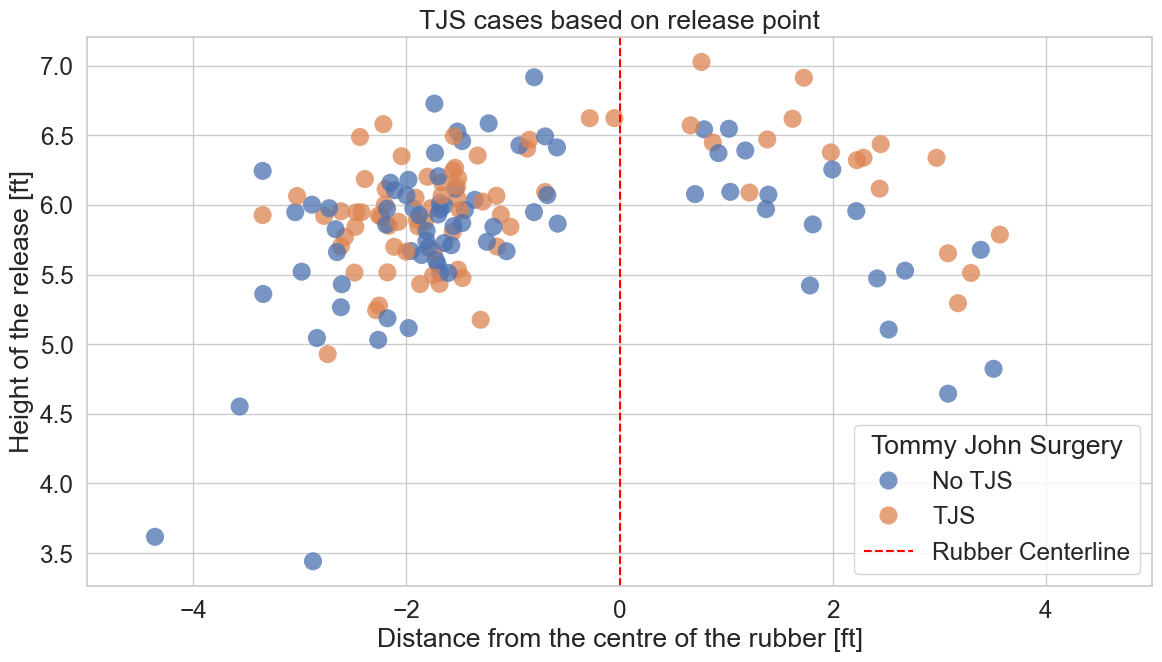

In [4]:
plt.figure(figsize=(12, 7))  # Figure size
sns.set(style="whitegrid", font_scale=1.6)


g = sns.scatterplot(data=df, x="release_point_x_mean", y="release_point_z_mean", hue="TJS", s=170, alpha=0.75, edgecolor= "none")  #plotting

# Setting title, labels
plt.title("TJS cases based on release point")
plt.xlabel("Distance from the centre of the rubber [ft]")
plt.ylabel("Height of the release [ft]")


g.set(xlim=(-5, 5))  #setting x-axis limits to get 0 in the middle
plt.axvline(x=0, color='red', linestyle='--', label='Rubber Centerline')  #generating the centerline


handles, labels = g.get_legend_handles_labels()  #getting legend data

label_map = {"0": "No TJS", "1": "TJS"}  #label mapping
new_labels = [label_map.get(l, l) for l in labels] #generating legend labels
plt.legend(handles=handles, labels=new_labels, title="Tommy John Surgery") #modifying legend

plt.tight_layout()  #Tighting layout

/var/folders/c6/mjv_3yhn2yq8cd7vd4x458kw0000gn/T/ipykernel_17228/795623536.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "Fastball velocity based on throwing arm",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]", ylim=(85, 105)) #setting title, labels


<Axes: title={'center': 'Fastball velocity based on throwing arm'}, xlabel='Throwing Arm', ylabel='Fastball Velocity [mph]'>

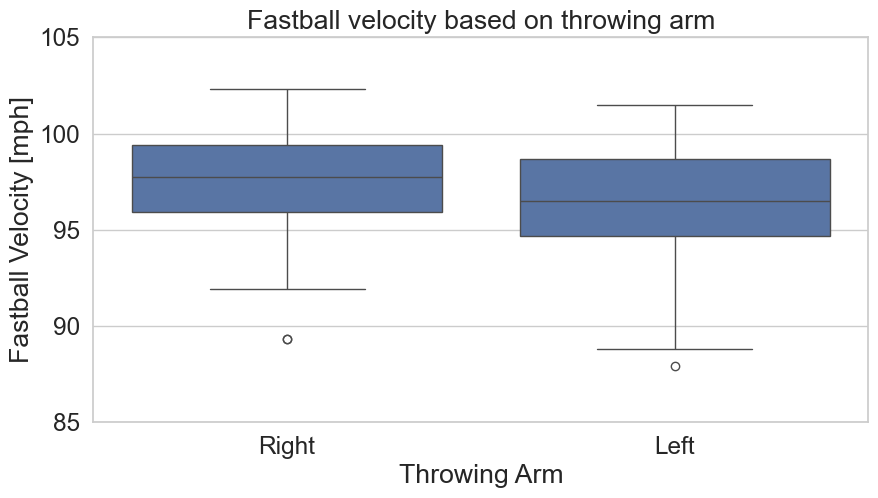

In [5]:
plt.figure(figsize=(10, 5))  #figure
ax = plt.axes()  #axes
ax.set(title = "Fastball velocity based on throwing arm",  xticklabels=["Right", "Left"], xlabel="Throwing Arm", ylabel="Fastball Velocity [mph]", ylim=(85, 105)) #setting title, labels
#sns.stripplot(x="isLefty", y="FF_max_velo", data=df, jitter=.25, color='orange', alpha=0.4, size=8)  #Plotting stripplot
sns.boxplot(x="isLefty", y="FF_max_velo", data=df)  #plotting boxplot

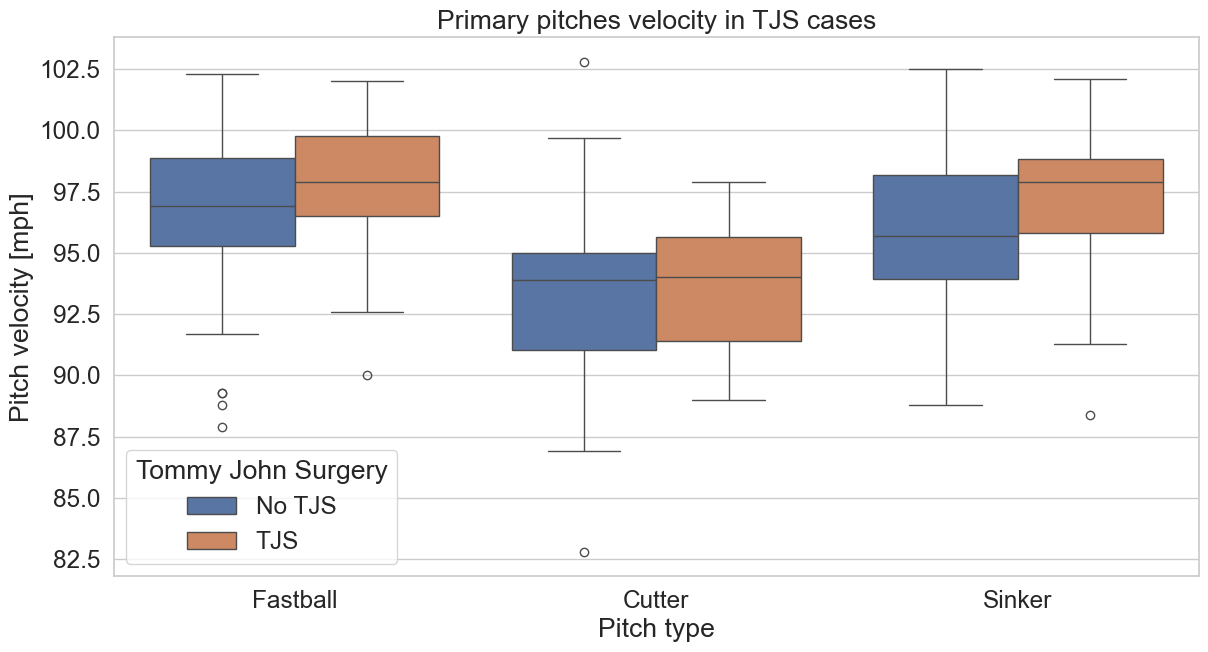

In [6]:
plt.figure(figsize=(14, 7))  #figure
ax = plt.axes() #axes
ax.set(title = "Primary pitches velocity in TJS cases",xticks=[0, 1, 2] ,  xticklabels=["Fastball", "Cutter", "Sinker"], xlabel="Pitch type", ylabel="Pitch velocity [mph]")  #setting title, labels
#sns.stripplot(x="TJS", y="FF_max_velo", data=df, jitter=.25, color='orange', alpha=0.4, size=8)  #plotting stripplot
sns.boxplot(x=0, y="FF_max_velo", data=df, hue="TJS") #plotting fastball boxplot
sns.boxplot(x=1, y="FC_max_velo", data=df, hue="TJS") #plotting cutter boxplot
sns.boxplot(x=2, y="SI_max_velo", data=df, hue="TJS") #plotting sinker boxplot

plt.legend(title="Tommy John Surgery", labels=["No TJS", "TJS"])

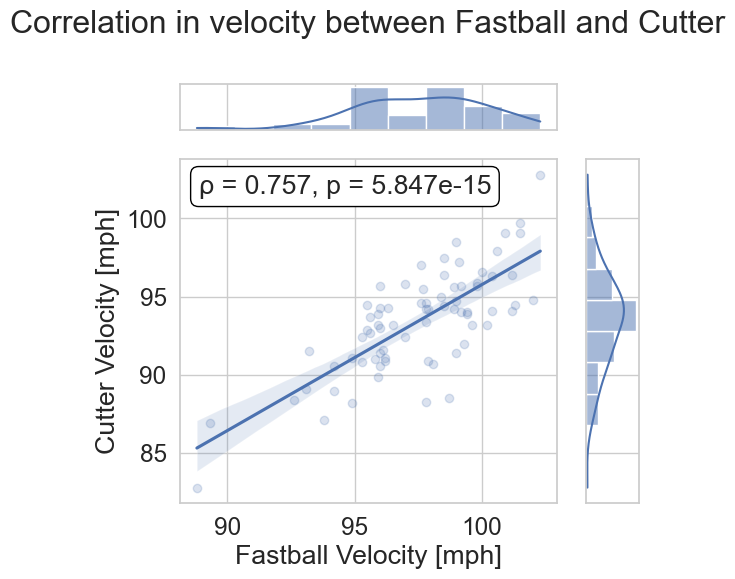

In [7]:
m = df["FF_max_velo"].notnull() 
m1 = df["FC_max_velo"].notnull()
masked_df1 = df[['FF_max_velo', "FC_max_velo"]][m & m1] #mask application

g = sns.jointplot(masked_df1, x = 'FF_max_velo', y = "FC_max_velo", kind='reg', height = 6.0, ratio = 5,
              joint_kws = {'scatter_kws':dict(alpha=0.2)})   #Plotting

#Setting title, labels
g.set_axis_labels("Fastball Velocity [mph]", "Cutter Velocity [mph]")   
g.fig.suptitle("Correlation in velocity between Fastball and Cutter")

g.fig.tight_layout() #Tighting layout


r, p = stats.pearsonr( masked_df1['FF_max_velo'], masked_df1['FC_max_velo'])  #Calculate pearson correlation of the data
g.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3e}', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black'})  #Display pearson value on the graph
sns.despine(top=False, right=False) # Setting boarders

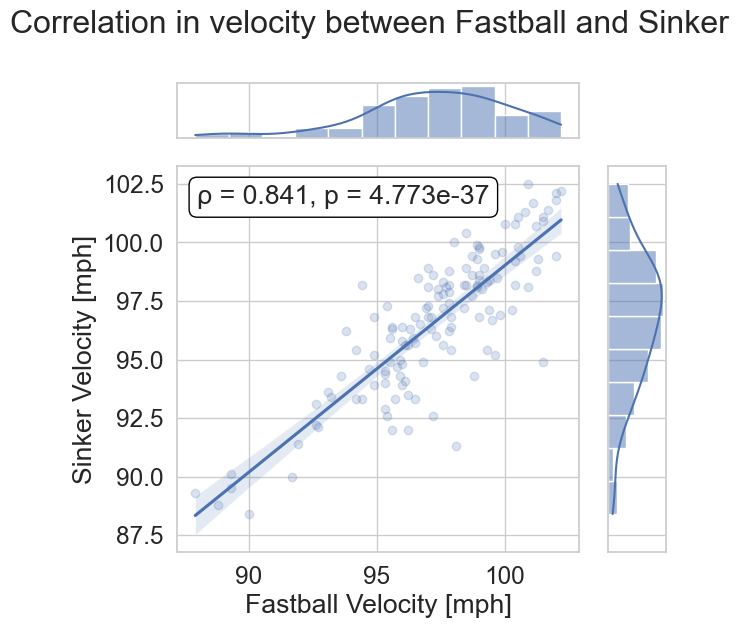

In [8]:
m = df["FF_max_velo"].notnull() #masks to avoid Nan
m1 = df["SI_max_velo"].notnull() 
masked_df1 = df[['FF_max_velo', "SI_max_velo"]][m & m1] #applicate mask

g = sns.jointplot(masked_df1, x = 'FF_max_velo', y = "SI_max_velo", kind='reg', height = 6.5, ratio = 5,
              joint_kws = {'scatter_kws':dict(alpha=0.2)})   #Plotting

g.set_axis_labels("Fastball Velocity [mph]", "Sinker Velocity [mph]")   #setting labels
g.fig.suptitle("Correlation in velocity between Fastball and Sinker")
g.fig.tight_layout()


r, p = stats.pearsonr( masked_df1['FF_max_velo'], masked_df1['SI_max_velo'])  #Calculate pearson correlation of the data
g.ax_joint.annotate(f'ρ = {r:.3f}, p = {p:.3e}', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'black'})  #Display pearson value on the graph
sns.despine(top=False, right=False) # Setting boarders